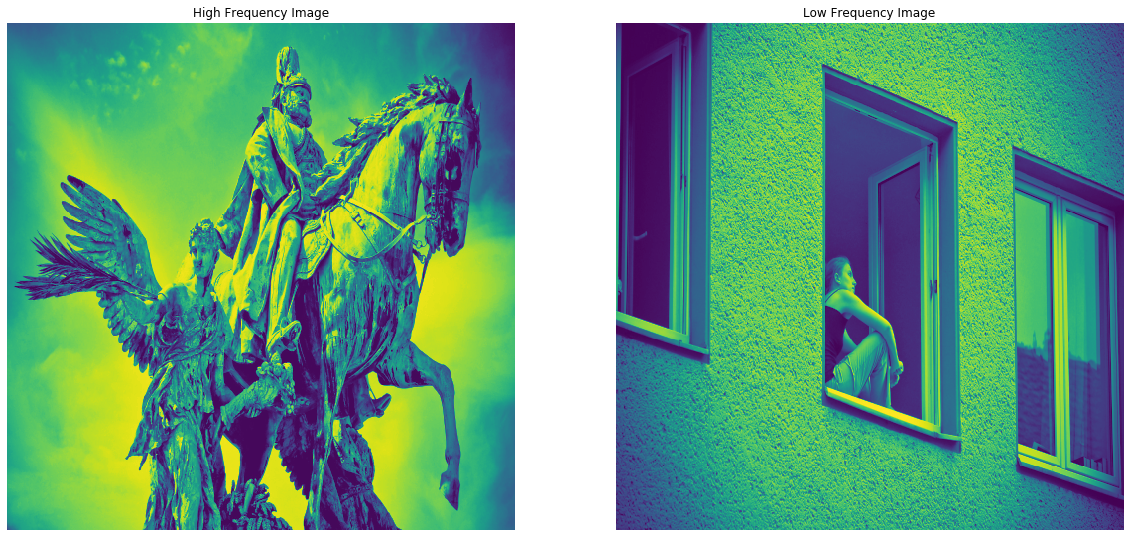

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


def haarMatrixT(n):
    
    #2**n 형태로 만들어주기
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrixT(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    #상위 Haar Matrix Transpose 구하기
    h_n = np.kron(h, [1, 1])
    
    #하위 Haar Matrix Transpose 구하기
    h_i = np.kron(np.eye(len(h)), [1, -1])

    #상 하위 배열 합치기
    h = np.vstack((h_n, h_i))
    
    return h


#이미지 Gray 형태로 Load해서 A배열에 넣어주기
image1 = cv2.imread('HighF_Image.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('LowF_Image.bmp', cv2.IMREAD_GRAYSCALE)

image1 = cv2.resize(image1, dsize=(512, 512), interpolation=cv2.INTER_AREA)
image2 = cv2.resize(image2, dsize=(512, 512), interpolation=cv2.INTER_AREA)

def ImageTransform(Image, K):
    A = Image
    matrixNum = 512

    #n = 512인 HaarMatrix Transpose 만들기
    Ht = haarMatrixT(matrixNum)

    #normalization 해주기
    for i in range (0,matrixNum):
        Ht[i] = Ht[i] / np.linalg.norm(Ht[i])

    #HaarMatrix Transpose>> HaarMatrix
    H = np.transpose(Ht)

    '''
    @ = matrix_multiply symbol
    HWT 수행: 행렬곱 B = H'*A*H
    '''
    B = Ht@A@H
    k= K

    '''
    행렬 B 자르기: B의 upper left corner(subsquare matrix)를 잘라 Bhat에 저장
    Bhat은 B와 사이즈가 같으며 B에서 잘라서 저장한 부분 외에는 모두 0으로 채워짐
    '''
    B[k:, :]=0
    B[:,k:]=0
    Bhat = B

    '''
    IHWT 수행: Ahat = H*Bhat*H'
    '''
    Ahat = H@Bhat@Ht
    
    return Ahat

image1 = ImageTransform(image1,512)
image2 = ImageTransform(image2,512)

fig = plt.figure(figsize=(20,20))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image1)
ax1.set_title('High Frequency Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image2)
ax2.set_title('Low Frequency Image')
ax2.axis("off")

plt.show()




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import normalize

def haarMatrix(n):
    # Allow only size n of power 2
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h,[1, 1])
    # calculate lower haar part 

    h_i = np.kron(np.eye(len(h)), [1, -1])

    # combine parts
    h = np.vstack((h_n, h_i))
    
    return h

#이미지 로드해서 A배열에 넣어주기
#image = cv2.imread('image_lena_24bit.bmp', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('image_lena_24bit.bmp', cv2.IMREAD_GRAYSCALE)

A = image


matrixNum = 8

#n = 512인 HaarMatrix 만들기
H = haarMatrix(matrixNum)
Ht = np.transpose(H)

normed_matrix = normalize(H, axis=1, norm='l2')
'''
for i in range (0,4):
    H[i] = H[i] / np.linalg.norm(H[i])

A = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])

B = Ht@A@H
A = H@B@Ht
D = np.array([[3,0,0,0],[0,3,0,0],[0,0,3,0],[0,0,0,3]])

print(A@D)
'''
print(H)
print(H[0])
print(Ht)

In [ ]:
B = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
k=3
B[k:, :]=0
B[:,k:]=0
print(B)

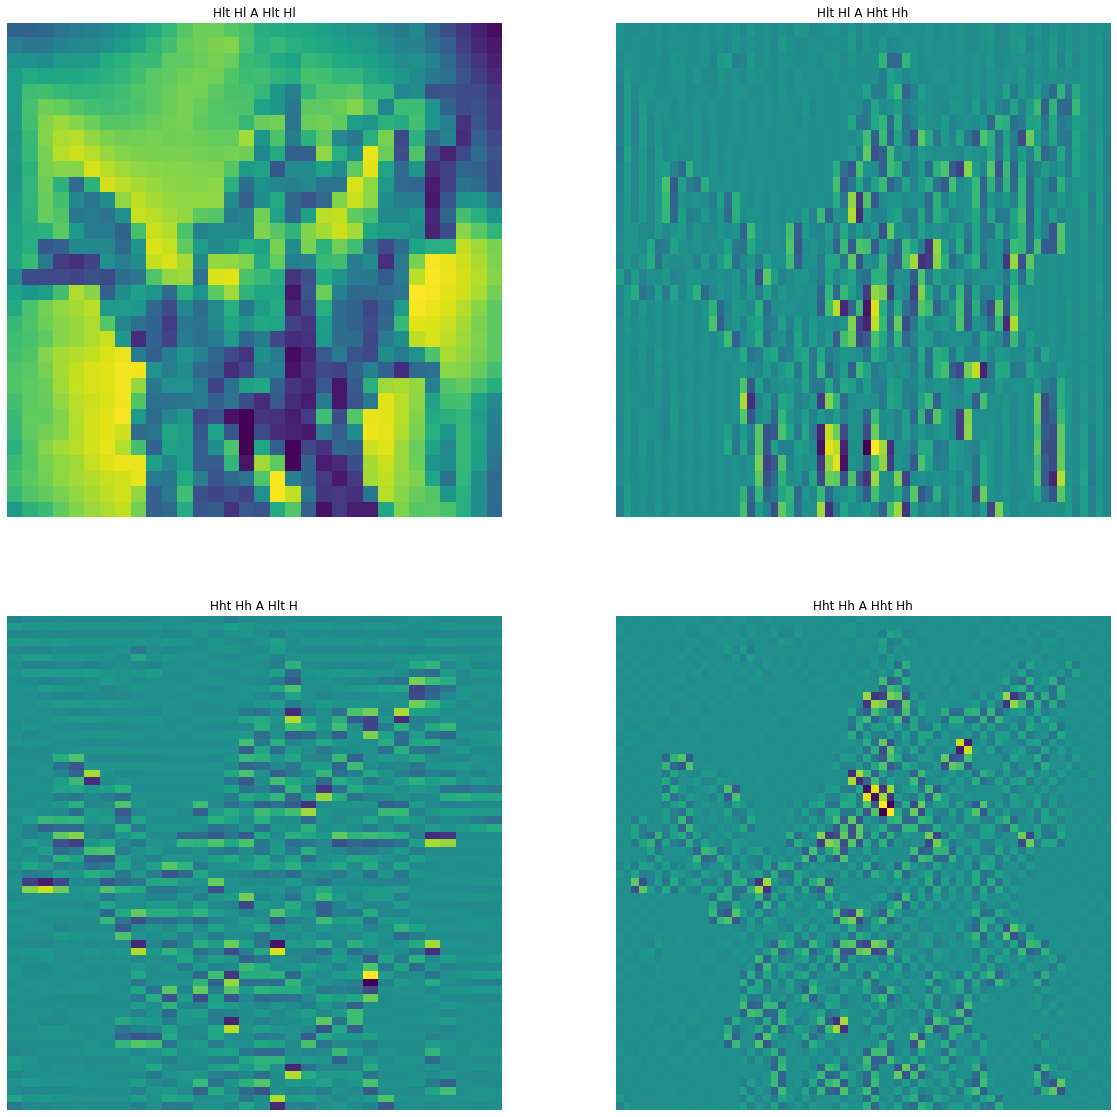

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


def haarMatrixT(n):
    
    #2**n 형태로 만들어주기
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrixT(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    #상위 Hahr Matrix Transpose 구하기
    Hl= np.kron(h, [1, 1])
    
    #하위 Haar Matrix Transpose 구하기
    Hh = np.kron(np.eye(len(h)), [1, -1])

    #상 하위 배열 합치기
    h = np.vstack((Hl, Hh))
    
    return h


#이미지 Gray 형태로 Load해서 A배열에 넣어주기
image1 = cv2.imread('HighF_Image.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('LowF_Image.bmp', cv2.IMREAD_GRAYSCALE)

image1 = cv2.resize(image1, dsize=(512, 512), interpolation=cv2.INTER_AREA)
image2 = cv2.resize(image2, dsize=(512, 512), interpolation=cv2.INTER_AREA)


def ImageTransform(Image, H, K):
    A = Image
    matrixNum = K
    
    #HaarMatrix Transpose>> HaarMatrix
    Hl = H[:int(matrixNum/2) ,:]
    Hh = H[int(matrixNum/2) : , :]
    
    
    Hlt = np.transpose(Hl)
    Hht = np.transpose(Hh)
    
    return Hlt@Hl@A@Hlt@Hl, Hlt@Hl@A@Hht@Hh, Hht@Hh@A@Hlt@Hl, Hht@Hh@A@Hht@Hh, Hl, int(matrixNum/2)


#n = 512인 HaarMatrix Transpose 만들기
H = haarMatrixT(matrixNum)
    
#normalization 해주기
for i in range (0, matrixNum):
    H[i] = H[i] / np.linalg.norm(H[i])
K = 512

for i in range(0,4):
    image1, image2, image3, image4, H, K = ImageTransform(image1,H, K)



fig = plt.figure(figsize=(20,20))
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(image1)
ax1.set_title('Hlt Hl A Hlt Hl')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(image2)
ax2.set_title('Hlt Hl A Hht Hh')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(image3)
ax3.set_title('Hht Hh A Hlt H')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(image4)
ax4.set_title('Hht Hh A Hht Hh')
ax4.axis("off")

plt.show()




In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


def haarMatrixT(n):
    
    #2**n 형태로 만들어주기
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrixT(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    #상위 Haar Matrix Transpose 구하기
    h_n = np.kron(h, [1, 1])
    
    #하위 Haar Matrix Transpose 구하기
    h_i = np.kron(np.eye(len(h)), [1, -1])

    #상 하위 배열 합치기
    h = np.vstack((h_n, h_i))
    
    return h


#이미지 Gray 형태로 Load해서 A배열에 넣어주기
image1 = cv2.imread('HighF_Image.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('LowF_Image.bmp', cv2.IMREAD_GRAYSCALE)

image1 = cv2.resize(image1, dsize=(512, 512), interpolation=cv2.INTER_AREA)
image2 = cv2.resize(image2, dsize=(512, 512), interpolation=cv2.INTER_AREA)


A = image1
matrixNum = 512

#n = 512인 HaarMatrix Transpose 만들기

#normalization 해주기
for i in range (0, int(matrixNum/2)):
    Hl[i] = Hl[i] / np.linalg.norm(Hl[i])
    Hh[i] = Hh[i] / np.linalg.norm(Hh[i])

    #HaarMatrix Transpose>> HaarMatrix
Hlt = np.transpose(Hh)
Hht = np.transpose(Hl)

print(h)


[[array([[array([[array([[array([[array([[array([[array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1.],
       [ 1., -1.,  0., -0.],
       [ 0., -0.,  1., -1.]]),
        array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1.],
       [ 1., -1.,  0., -0.],
       [ 0., -0.,  1., -1.]]),
        array([[ 1,  1,  1,  1],
       [ 1,  1, -1, -1]]),
        array([[ 1,  1,  1,  1],
       [ 1,  1, -1, -1]]),
        array([[ 1., -1.,  0., -0.],
       [ 0., -0.,  1., -1.]]),
        array([[ 1., -1.,  0., -0.],
       [ 0., -0.,  1., -1.]])],
       [1.0, -1.0, 0.0, -0.0, 0.0, -0.0],
       [0.0, -0.0, 1.0, -1.0, 0.0, -0.0],
       [0.0, -0.0, 0.0, -0.0, 1.0, -1.0]], dtype=object),
        array([[array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1.],
       [ 1., -1.,  0., -0.],
       [ 0., -0.,  1., -1.]]),
        array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1.],
       [ 1., -1.,  0., -0.],
       [ 0., -0.,  1., -1.]]),
        array([[ 1,  1,  1,  1],
       [ 1,  1

'\n#normalization 해주기\nfor i in range (0, int(matrixNum/2)):\n    Hl[i] = Hl[i] / np.linalg.norm(Hl[i])\n    Hh[i] = Hh[i] / np.linalg.norm(Hh[i])\n\n    #HaarMatrix Transpose>> HaarMatrix\nHlt = np.transpose(Hh)\nHht = np.transpose(Hl)\n'